<h1>DATA ANALYTICS FOR ACCIDENT DATA</h1>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import f_oneway

<h1>GET THE DATA FRAME</h1>

<h1>INSIGHT NUMBER 1</h1>

In [2]:
accident = pd.read_csv('datasets//accident_data.csv')
accident

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,05/06/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,02/07/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26/08/2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16/08/2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,03/09/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18/02/2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21/02/2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23/02/2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23/02/2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


<h1>INSIGHT NUMBER 2</h1>

<h2>GET ACCIDENT INFO AND DESCRIBE</h2>

In [3]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident Date            660679 non-null  object 
 3   Latitude                 660654 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District Area            660679 non-null  object 
 6   Longitude                660653 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  659953 non-null  object 
 10  Road_Type                656159 non-null  object 
 11  Urban_or_Rural_Area      660664 non-null  object 
 12  Weather_Conditions       646551 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
dtypes: f

In [4]:
accident.describe()

,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles
count,660654.000000,660653.000000,660679.000000,660679.000000
mean,52.553866,-1.431210,1.357040,1.831255
std,1.406922,1.383330,0.824847,0.715269
min,49.914430,-7.516225,1.000000,1.000000
25%,51.490690,-2.332291,1.000000,1.000000
50%,52.315641,-1.411667,1.000000,2.000000
75%,53.453452,-0.232869,1.000000,2.000000
max,60.757544,1.762010,68.000000,32.000000


In [5]:
accident.describe().T

,count,mean,std,min,25%,50%,75%,max
Latitude,660654.0,52.553866,1.406922,49.914430,51.490690,52.315641,53.453452,60.757544
Longitude,660653.0,-1.431210,1.383330,-7.516225,-2.332291,-1.411667,-0.232869,1.762010
Number_of_Casualties,660679.0,1.357040,0.824847,1.000000,1.000000,1.000000,1.000000,68.000000
Number_of_Vehicles,660679.0,1.831255,0.715269,1.000000,1.000000,2.000000,2.000000,32.000000


<h2>GET THE DATA FROM EACH COLUMN</h2>

In [6]:
accident['Accident_Severity']

0         Serious
1         Serious
2         Serious
3         Serious
4          Slight
           ...   
660674     Slight
660675     Slight
660676     Slight
660677    Serious
660678    Serious
Name: Accident_Severity, Length: 660679, dtype: object

<h2>GET THE NULL VALUE</h2>

In [7]:
accident.isnull()

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,False,False,False,False,False,False,False,False,False,False,False,False,False,False
660675,False,False,False,False,False,False,False,False,False,False,False,False,False,False
660676,False,False,False,False,False,False,False,False,False,False,False,False,False,False
660677,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
accident.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

<h1>INSIGHT NUMBER 3</h1>

<h2>FILLING UP THE NULL VALUE</h2>

In [9]:
accident['Latitude'] = accident['Latitude'].fillna(accident['Latitude'].mode()[0])
accident['Longitude'] = accident['Longitude'].fillna(accident['Longitude'].mode()[0])
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].fillna('unknown surface conditions')
accident['Road_Type'] = accident['Road_Type'].fillna('unaccounted')
accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].fillna(accident['Urban_or_Rural_Area'].mode()[0])
accident['Weather_Conditions'] = accident['Weather_Conditions'].fillna('unaccounted weather conditions')

In [10]:
accident.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

<h2>CONVERT DATA TYPE TO_DATETIME DATA TYPE</h2>

In [11]:
accident['Accident Date'] = pd.to_datetime(accident['Accident Date'], dayfirst = True, errors = 'coerce')
accident.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

In [12]:
# accident['Accident Date'] = accident['Accident Date'].str.strip()
# accident['Accident Date'] = accident['Accident Date'].str.replace('/', '-')

<h1>INSIGHT NUMBER 4</h1>

<h1>EXTRACTING DATE INFORMATION USING PANDAS DATE TIME</h1>

In [13]:
accident['Year'] = accident['Accident Date'].dt.year
accident['Month'] = accident['Accident Date'].dt.month
accident['Day'] = accident['Accident Date'].dt.day
accident['DayOfWeek'] = accident['Accident Date'].dt.dayofweek

In [14]:
accident['Year']

0         2019
1         2019
2         2019
3         2019
4         2019
          ... 
660674    2022
660675    2022
660676    2022
660677    2022
660678    2022
Name: Year, Length: 660679, dtype: int32

<h1>INSIGHT NUMBER 5</h1>

<h3>MAKING YEAR VARIABLES</h3>

<h3>YEAR 2019</h3>

In [15]:
year_2019 = accident[accident['Year'] == 2019]
year_2019

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
0,200701BS64157,Serious,2019-06-05,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2019,6,5,2
1,200701BS65737,Serious,2019-07-02,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car,2019,7,2,1
2,200701BS66127,Serious,2019-08-26,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,unaccounted,Urban,unaccounted weather conditions,Taxi/Private hire car,2019,8,26,0
3,200701BS66128,Serious,2019-08-16,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats),2019,8,16,4
4,200701BS66837,Slight,2019-09-03,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,unaccounted,Urban,unaccounted weather conditions,Other vehicle,2019,9,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182110,2.01E+12,Slight,2019-12-20,54.985289,Darkness - no lighting,Dumfries and Galloway,-3.210294,1,1,Frost or ice,Single carriageway,Rural,Other,Car,2019,12,20,4
182111,2.01E+12,Serious,2019-12-21,54.984105,Daylight,Dumfries and Galloway,-3.193693,2,1,Frost or ice,Single carriageway,Rural,Other,Car,2019,12,21,5
182112,2.01E+12,Slight,2019-12-23,55.166369,Darkness - no lighting,Dumfries and Galloway,-2.992068,1,1,Frost or ice,Single carriageway,Rural,Fog or mist,Van / Goods 3.5 tonnes mgw or under,2019,12,23,0
182113,2.01E+12,Slight,2019-12-23,54.995154,Darkness - lights lit,Dumfries and Galloway,-3.058338,1,1,Wet or damp,Single carriageway,Rural,Fine no high winds,Car,2019,12,23,0


In [16]:
year_2020 = accident[accident['Year'] == 2020]
year_2020

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
182115,200801BS69439,Serious,2020-01-23,51.506812,Darkness - lights lit,Kensington and Chelsea,-0.214677,1,1,Dry,unaccounted,Urban,Fine no high winds,Car,2020,1,23,3
182116,200801BS69594,Serious,2020-02-15,51.496323,Daylight,Kensington and Chelsea,-0.170138,1,1,Dry,Dual carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats),2020,2,15,5
182117,200801BS69698,Serious,2020-02-27,51.502042,Darkness - lights lit,Kensington and Chelsea,-0.190946,1,1,Dry,Single carriageway,Urban,Fine no high winds,Van / Goods 3.5 tonnes mgw or under,2020,2,27,3
182118,200801BS69935,Serious,2020-02-25,51.492733,Daylight,Kensington and Chelsea,-0.193763,1,1,Dry,Roundabout,Urban,Fine no high winds,Car,2020,2,25,1
182119,200801BS69938,Serious,2020-02-27,51.493271,Darkness - lights lit,Kensington and Chelsea,-0.199504,1,2,Dry,Dual carriageway,Urban,Fine no high winds,Motorcycle over 500cc,2020,2,27,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352701,2.01E+12,Slight,2020-11-24,55.233969,Darkness - no lighting,Dumfries and Galloway,-3.394276,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Minibus (8 - 16 passenger seats),2020,11,24,1
352702,2.01E+12,Slight,2020-12-06,54.983911,Daylight,Dumfries and Galloway,-3.195094,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Motorcycle 125cc and under,2020,12,6,6
352703,2.01E+12,Slight,2020-12-17,55.008072,Darkness - no lighting,Dumfries and Galloway,-3.334825,1,1,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc,2020,12,17,3
352704,2.01E+12,Slight,2020-12-16,54.986388,Daylight,Dumfries and Galloway,-3.180789,1,1,Dry,Single carriageway,Rural,Fine no high winds,Bus or coach (17 or more pass seats),2020,12,16,2


In [17]:
year_2021 = accident[accident['Year'] == 2021]
year_2021

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
352706,200901BS70001,Serious,2021-01-01,51.512273,Daylight,Kensington and Chelsea,-0.201349,1,2,Dry,One way street,Urban,Fine no high winds,Car,2021,1,1,4
352707,200901BS70002,Serious,2021-01-05,51.514399,Daylight,Kensington and Chelsea,-0.199248,11,2,Wet or damp,Single carriageway,Urban,Fine no high winds,Taxi/Private hire car,2021,1,5,1
352708,200901BS70003,Slight,2021-01-04,51.486668,Daylight,Kensington and Chelsea,-0.179599,1,2,Dry,Single carriageway,Urban,Fine no high winds,Taxi/Private hire car,2021,1,4,0
352709,200901BS70004,Serious,2021-01-05,51.507804,Daylight,Kensington and Chelsea,-0.203110,1,2,Frost or ice,Single carriageway,Urban,Other,Motorcycle over 500cc,2021,1,5,1
352710,200901BS70005,Serious,2021-01-06,51.482076,Darkness - lights lit,Kensington and Chelsea,-0.173445,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2021,1,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516255,2.01E+12,Serious,2021-12-15,55.072192,Darkness - no lighting,Dumfries and Galloway,-3.297647,1,5,Dry,Dual carriageway,Rural,Fine no high winds,Motorcycle 125cc and under,2021,12,15,2
516256,2.01E+12,Serious,2021-12-20,55.008460,Darkness - lights lit,Dumfries and Galloway,-3.088242,1,1,Frost or ice,Slip road,Rural,Fine no high winds,Car,2021,12,20,0
516257,2.01E+12,Slight,2021-12-23,54.995302,Daylight,Dumfries and Galloway,-3.259680,1,1,Frost or ice,Single carriageway,Rural,Snowing + high winds,Motorcycle over 125cc and up to 500cc,2021,12,23,3
516258,2.01E+12,Slight,2021-12-21,55.120172,Darkness - lights lit,Dumfries and Galloway,-3.356438,1,2,Frost or ice,Single carriageway,Rural,Other,Car,2021,12,21,1


In [18]:
year_2022 = accident[accident['Year'] == 2022]
year_2022

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
516260,201001BS70003,Slight,2022-01-11,51.484087,Daylight,Kensington and Chelsea,-0.164002,1,2,Wet or damp,Single carriageway,Urban,Other,Car,2022,1,11,1
516261,201001BS70004,Slight,2022-01-11,51.509212,Darkness - lights lit,Kensington and Chelsea,-0.195273,1,1,Wet or damp,Single carriageway,Urban,Raining no high winds,Car,2022,1,11,1
516262,201001BS70006,Slight,2022-01-12,51.507804,Daylight,Kensington and Chelsea,-0.203110,1,2,Dry,Single carriageway,Urban,Fine no high winds,Motorcycle over 500cc,2022,1,12,2
516263,201001BS70007,Slight,2022-01-02,51.513314,Darkness - lights lit,Kensington and Chelsea,-0.198858,1,2,Dry,Roundabout,Urban,Fine no high winds,Van / Goods 3.5 tonnes mgw or under,2022,1,2,6
516264,201001BS70008,Slight,2022-01-04,51.484361,Darkness - lights lit,Kensington and Chelsea,-0.175802,1,2,Wet or damp,Single carriageway,Urban,Fine no high winds,Motorcycle 125cc and under,2022,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,2022-02-18,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car,2022,2,18,4
660675,201091NM01881,Slight,2022-02-21,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car,2022,2,21,0
660676,201091NM01935,Slight,2022-02-23,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car,2022,2,23,2
660677,201091NM01964,Serious,2022-02-23,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc,2022,2,23,2


In [34]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Index                    660679 non-null  object        
 1   Accident_Severity        660679 non-null  object        
 2   Accident Date            660679 non-null  datetime64[ns]
 3   Latitude                 660679 non-null  float64       
 4   Light_Conditions         660679 non-null  object        
 5   District Area            660679 non-null  object        
 6   Longitude                660679 non-null  float64       
 7   Number_of_Casualties     660679 non-null  int64         
 8   Number_of_Vehicles       660679 non-null  int64         
 9   Road_Surface_Conditions  660679 non-null  object        
 10  Road_Type                660679 non-null  object        
 11  Urban_or_Rural_Area      660679 non-null  object        
 12  Weather_Conditio

<h1>INSIGHT NUMBER 6</h1>

<h2>get light conditions each year</h2>

In [19]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Index                    660679 non-null  object        
 1   Accident_Severity        660679 non-null  object        
 2   Accident Date            660679 non-null  datetime64[ns]
 3   Latitude                 660679 non-null  float64       
 4   Light_Conditions         660679 non-null  object        
 5   District Area            660679 non-null  object        
 6   Longitude                660679 non-null  float64       
 7   Number_of_Casualties     660679 non-null  int64         
 8   Number_of_Vehicles       660679 non-null  int64         
 9   Road_Surface_Conditions  660679 non-null  object        
 10  Road_Type                660679 non-null  object        
 11  Urban_or_Rural_Area      660679 non-null  object        
 12  Weather_Conditio

In [20]:
accident['Year'].value_counts()

Year
2019    182115
2020    170591
2021    163554
2022    144419
Name: count, dtype: int64

In [21]:
year_2019['Light_Conditions'].value_counts()

Light_Conditions
Daylight                       133042
Darkness - lights lit           35769
Darkness - no lighting          10842
Darkness - lighting unknown      1768
Darkness - lights unlit           694
Name: count, dtype: int64

<h4>73% OF THE ACCIDENT IN 2019 HAPPENED IN DAYLIGHT</h4>

In [22]:
year_2020['Light_Conditions'].value_counts()

Light_Conditions
Daylight                       124552
Darkness - lights lit           33473
Darkness - no lighting          10067
Darkness - lighting unknown      1792
Darkness - lights unlit           707
Name: count, dtype: int64

In [23]:
year_2021['Light_Conditions'].value_counts()

Light_Conditions
Daylight                       119518
Darkness - lights lit           32549
Darkness - no lighting           9226
Darkness - lighting unknown      1607
Darkness - lights unlit           654
Name: count, dtype: int64

In [24]:
year_2022['Light_Conditions'].value_counts()

Light_Conditions
Daylight                       107768
Darkness - lights lit           27544
Darkness - no lighting           7302
Darkness - lighting unknown      1317
Darkness - lights unlit           488
Name: count, dtype: int64

<h1> Light Condition Each Year

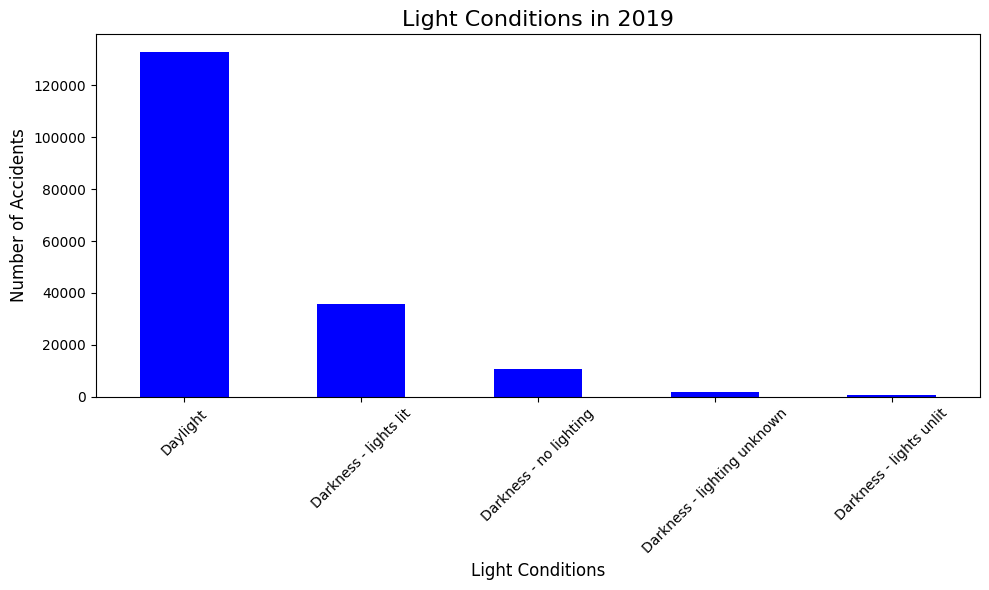

In [60]:
light_condition_counts = year_2019['Light_Conditions'].value_counts()

plt.figure(figsize=(10, 6))
light_condition_counts.plot(kind='bar', color='blue')
plt.title('Light Conditions in 2019', fontsize=16)
plt.xlabel('Light Conditions', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

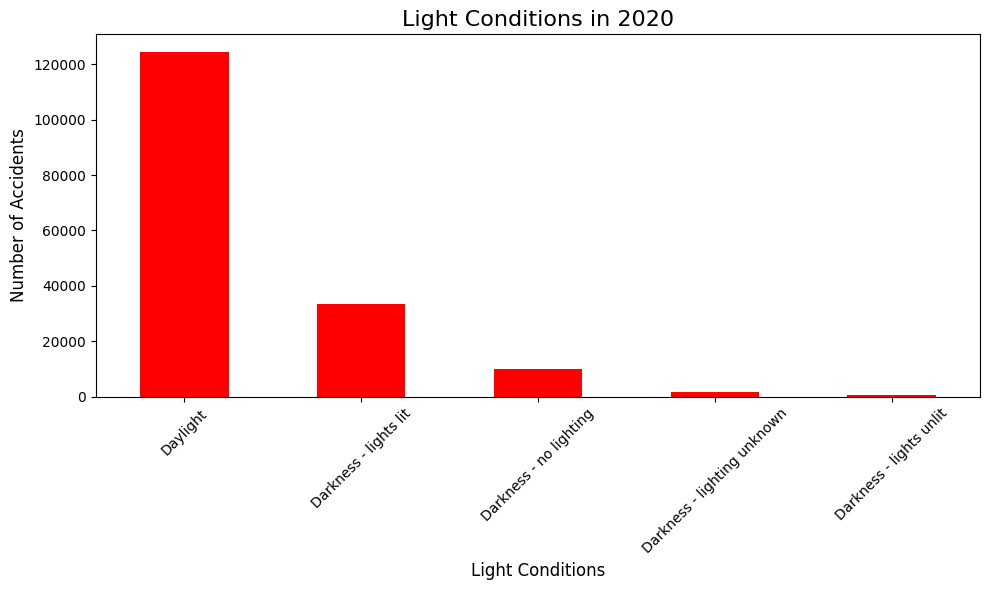

In [61]:
light_condition_counts = year_2020['Light_Conditions'].value_counts()

plt.figure(figsize=(10, 6))
light_condition_counts.plot(kind='bar', color='red')
plt.title('Light Conditions in 2020', fontsize=16)
plt.xlabel('Light Conditions', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

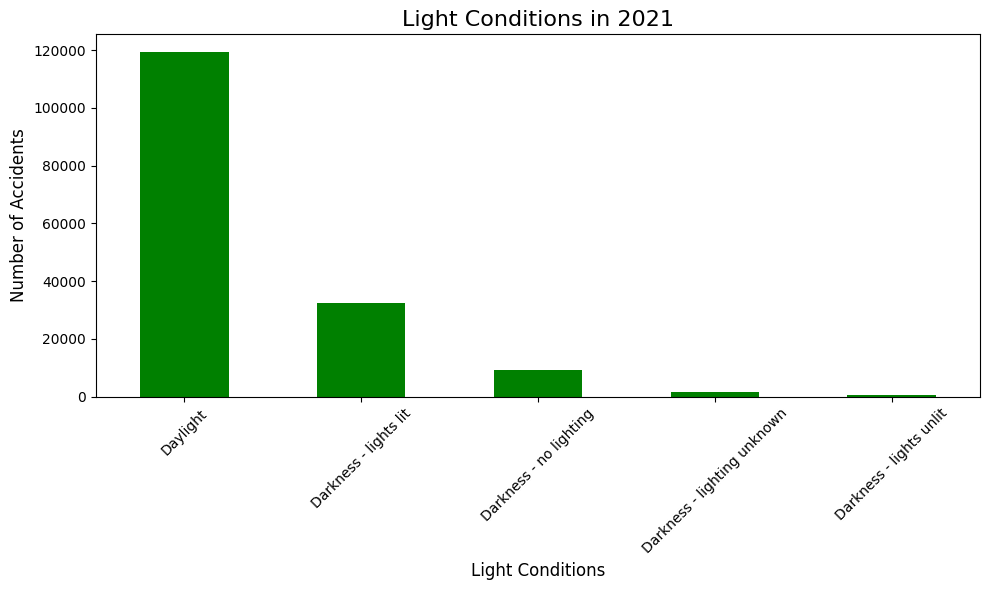

In [62]:
light_condition_counts = year_2021['Light_Conditions'].value_counts()

plt.figure(figsize=(10, 6))
light_condition_counts.plot(kind='bar', color='green')
plt.title('Light Conditions in 2021', fontsize=16)
plt.xlabel('Light Conditions', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

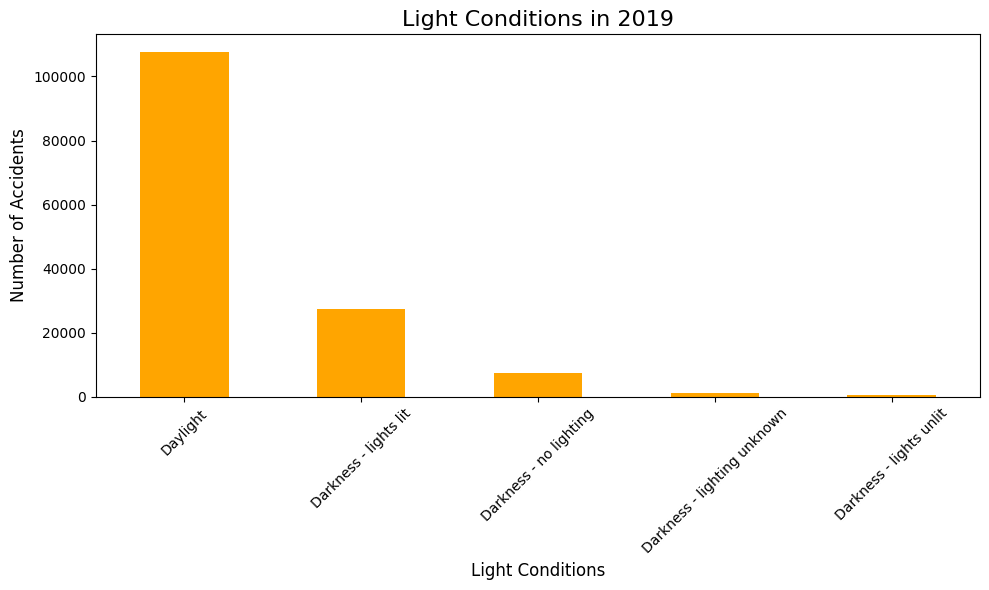

In [42]:
light_condition_counts = year_2022['Light_Conditions'].value_counts()

plt.figure(figsize=(10, 6))
light_condition_counts.plot(kind='bar', color='orange')
plt.title('Light Conditions in 2022', fontsize=16)
plt.xlabel('Light Conditions', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h1>INSIGHT NUMBER 7</h1>

<h2>ACCIDENT SEVERITY OF EACH YEAR</h2>

In [25]:
year_2019['Accident_Severity'].count()

np.int64(182115)

In [26]:
year_2019['Accident_Severity'].value_counts()

Accident_Severity
Slight     155079
Serious     24322
Fatal        2714
Name: count, dtype: int64

<h4>THE TOTAL NUMBER OF CASUALTIES IN 2019 IS 182,115. 85.2% OF IT IS JUST A SLIGHT CASUALTY, 13.4% IS SERIOUS CASUALTIES AND 1.5% ARE THE FATAL ONES</h4>

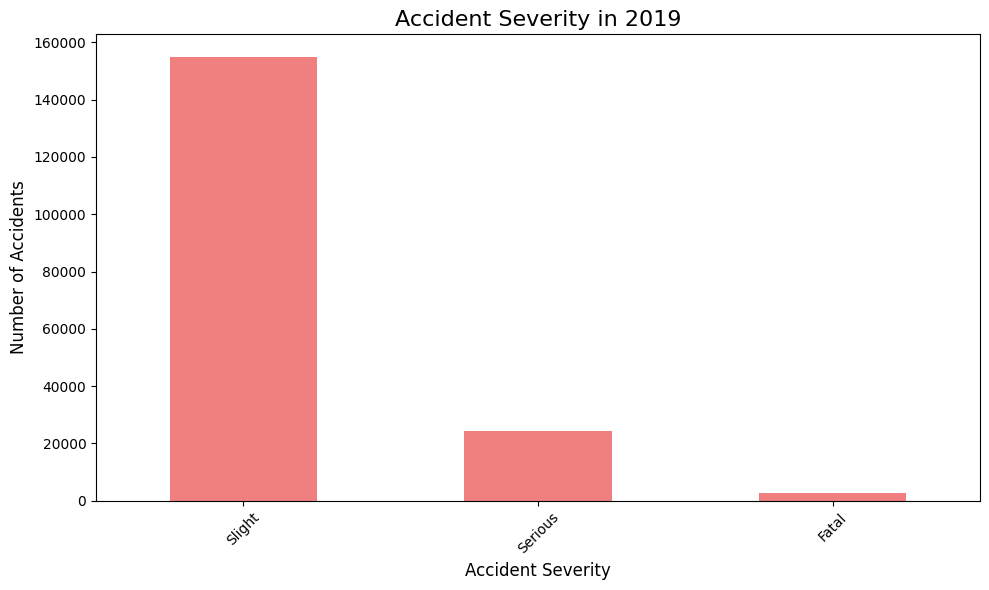

In [44]:
accident_severity_counts = year_2019['Accident_Severity'].value_counts()

plt.figure(figsize=(10, 6))
accident_severity_counts.plot(kind='bar', color='lightcoral')
plt.title('Accident Severity in 2019', fontsize=16)
plt.xlabel('Accident Severity', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [27]:
year_2020['Accident_Severity'].count()

np.int64(170591)

In [28]:
year_2020['Accident_Severity'].value_counts()

Accident_Severity
Slight     145129
Serious     23121
Fatal        2341
Name: count, dtype: int64

<h4>THE TOTAL NUMBER OF ACCIDENT SEVERITY IN 2020 IS 170,591. 85.1% OF IT IS JUST A SLIGHT CASUALTY, 13.6% OF IT IS SERIOUS INJURIES AND 1.4% IS FATALITY</h4>

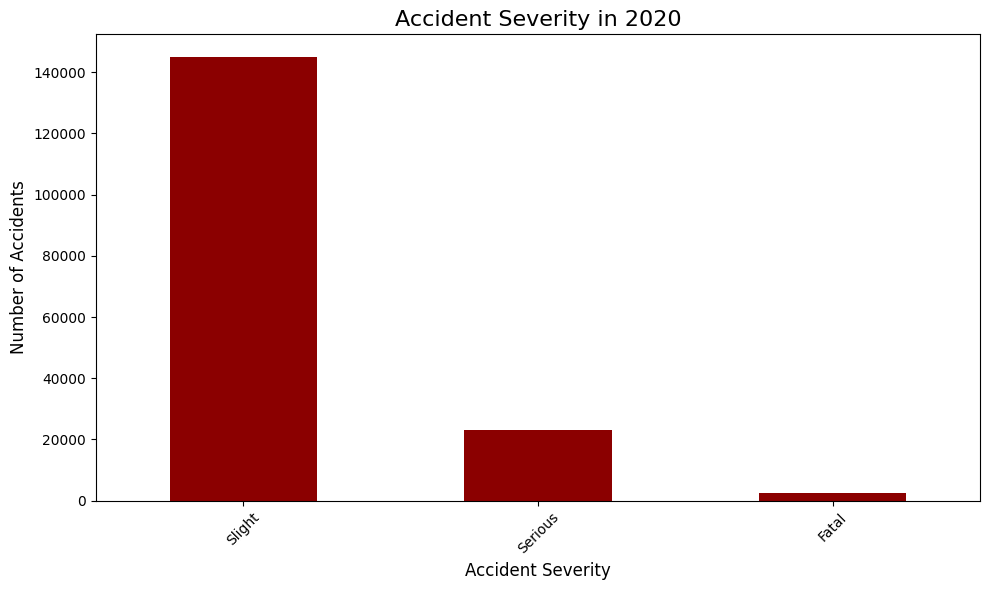

In [63]:
accident_severity_counts = year_2020['Accident_Severity'].value_counts()

plt.figure(figsize=(10, 6))
accident_severity_counts.plot(kind='bar', color='darkred')
plt.title('Accident Severity in 2020', fontsize=16)
plt.xlabel('Accident Severity', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [64]:
year_2021['Accident_Severity'].value_counts()

Accident_Severity
Slight     139500
Serious     21997
Fatal        2057
Name: count, dtype: int64

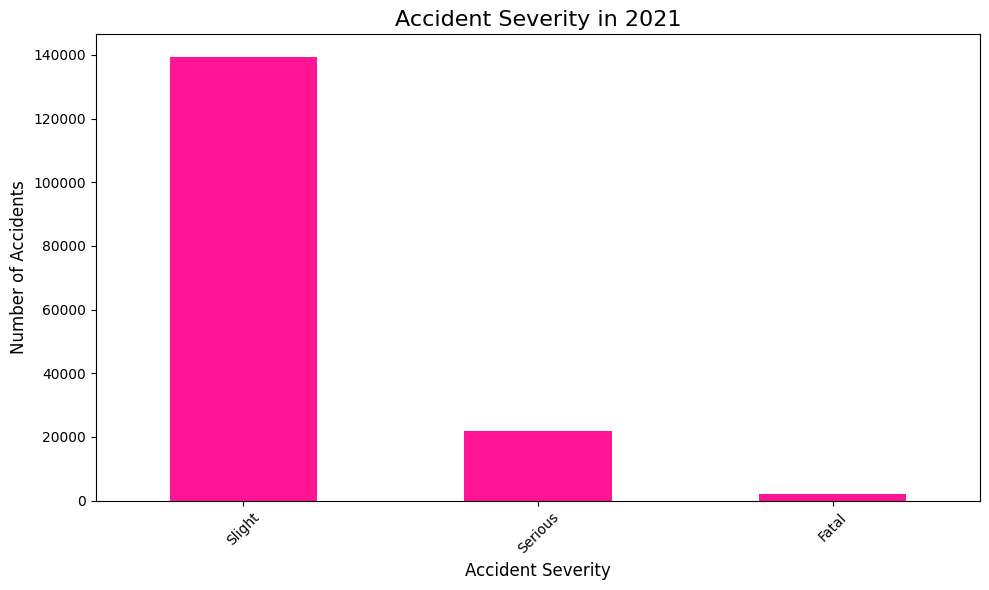

In [65]:
accident_severity_counts = year_2021['Accident_Severity'].value_counts()

plt.figure(figsize=(10, 6))
accident_severity_counts.plot(kind='bar', color='deeppink')
plt.title('Accident Severity in 2021', fontsize=16)
plt.xlabel('Accident Severity', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [66]:
year_2022['Accident_Severity'].value_counts()

Accident_Severity
Slight     124093
Serious     18777
Fatal        1549
Name: count, dtype: int64

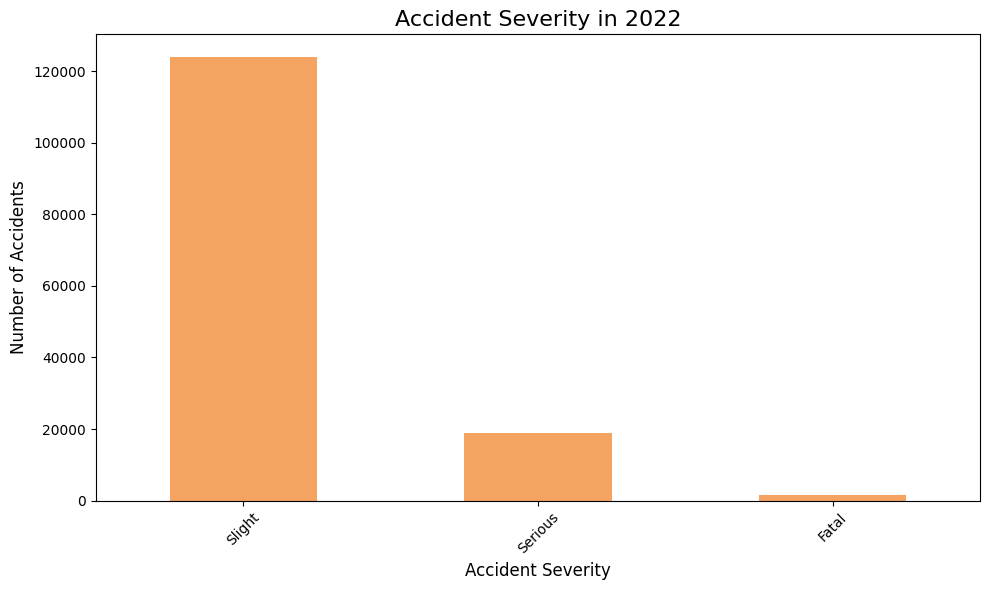

In [67]:
accident_severity_counts = year_2022['Accident_Severity'].value_counts()

plt.figure(figsize=(10, 6))
accident_severity_counts.plot(kind='bar', color='sandybrown')
plt.title('Accident Severity in 2022', fontsize=16)
plt.xlabel('Accident Severity', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h1>INSIGHT NUMBER 8</h1>

<h3>NUMBER OF CASUALTIES AND NUMBER OF VEHICLES</h3>

In [ ]:
y19_casualties_vehicle = year_2019['Number_of_Casualties'] & year_2019['Number_of_Vehicles']
y19_casualties_vehicle.value_counts()

<h4>IN TOTAL OF 124,809 VEHICLES THERE ARE 42.2% CASUALTIES THAT EVERY SINGLE VEHICLE CAUSED in 2019</h4>

In [ ]:
y20_casualties_vehicle.sum()

In [ ]:
y20_casualties_vehicle = year_2020['Number_of_Casualties'] & year_2020['Number_of_Vehicles']
y20_casualties_vehicle.value_counts()

<h4>IN TOTAL OF 116,517 VEHICLES, 47.7% HAVE 1 CASUALTIES IN EVERY VEHICLE in 2020</h4>

In [ ]:
y21_casualties_vehicle.sum()

In [ ]:
y21_casualties_vehicle = year_2021['Number_of_Casualties'] & year_2021['Number_of_Vehicles']
y21_casualties_vehicle.value_counts()

<h4>IN TOTAL OF 111,874 VEHICLES, 47.4% HAVE 1 CASUALTY IN EVER VEHICLE in 2021</h4>

In [ ]:
y22_casualties_vehicle.sum()

In [ ]:
y22_casualties_vehicle = year_2022['Number_of_Casualties'] & year_2022['Number_of_Vehicles']
y22_casualties_vehicle.value_counts()

<h4>IN TOTAL OF 97,974 VEHICLES, 46.6% HAVE 1 CASUALTY IN EVERY VEHICLE in 2022</h4>

In [ ]:
accident.info()

<h1>INSIGHT NUMBER 9</h1>

<h3>SUMMARY DATAFRAME OF TYPE OF VEHICLE AND NUMBER OF CASUALTIES</h3>

In [54]:
y19_casualties_vehicles = year_2019.groupby(['Number_of_Casualties', 'Vehicle_Type']).count()
y19_casualties_vehicles

Index  \
Number_of_Casualties Vehicle_Type                                  
1                    Agricultural vehicle                    491   
                     Bus or coach (17 or more pass seats)   8108   
                     Car                                   98714   
                     Goods 7.5 tonnes mgw and over          4691   
                     Goods over 3.5t. and under 7.5t        1570   
...                                                          ...   
29                   Car                                       2   
                     Van / Goods 3.5 tonnes mgw or under       1   
40                   Car                                       1   
42                   Car                                       1   
68                   Car                                       1   

                                                           Accident_Severity  \
Number_of_Casualties Vehicle_Type                                              
1                    Agricultural vehicle                                491   
                     Bus or coach (17 or more pass seats)               8108   
                     Car                                               98714   
                     Goods 7.5 tonnes mgw and over                      4691   
                     Goods over 3.5t. and under 7.5t                    1570   
...                                                                      ...   
29                   Car                                                   2   
                     Van / Goods 3.5 tonnes mgw or under                   1   
40                   Car                                                   1   
42                   Car                                                   1   
68                   Car                                                   1   

                                                           Accident Date  \
Number_of_Casualties Vehicle_Type                                          
1                    Agricultural vehicle                            491   
                     Bus or coach (17 or more pass seats)           8108   
                     Car                                           98714   
                     Goods 7.5 tonnes mgw and over                  4691   
                     Goods over 3.5t. and under 7.5t                1570   
...                                                                  ...   
29                   Car                                               2   
                     Van / Goods 3.5 tonnes mgw or under               1   
40                   Car                                               1   
42                   Car                                               1   
68                   Car                                               1   

                                                           Latitude  \
Number_of_Casualties Vehicle_Type                                     
1                    Agricultural vehicle                       491   
                     Bus or coach (17 or more pass seats)      8108   
                     Car                                      98714   
                     Goods 7.5 tonnes mgw and over             4691   
                     Goods over 3.5t. and under 7.5t           1570   
...                                                             ...   
29                   Car                                          2   
                     Van / Goods 3.5 tonnes mgw or under          1   
40                   Car                                          1   
42                   Car                                          1   
68                   Car                                          1   

                                                           Light_Conditions  \
Number_of_Casualties Vehicle_Type                                             
1                    Agricultural vehicle                     

In [ ]:
y20_casualties_vehicles = year_2020.groupby(['Number_of_Casualties', 'Vehicle_Type']).count()
y20_casualties_vehicles

In [ ]:
y21_casualties_vehicles = year_2021.groupby(['Number_of_Casualties', 'Vehicle_Type']).count()
y21_casualties_vehicles

In [ ]:
y22_casualties_vehicles = year_2022.groupby(['Number_of_Casualties', 'Vehicle_Type']).count()
y22_casualties_vehicles

<h1>INSIGHT NUMBER 10</h1>

<h3>SUMMARY DATAFRAME OF ROAD SURFACE CONDITION AND ROAD TYPES</h3>

In [ ]:
y19_rcondition_rtype = year_2019.groupby(['Road_Type', 'Road_Surface_Conditions']).count()
y19_rcondition_rtype

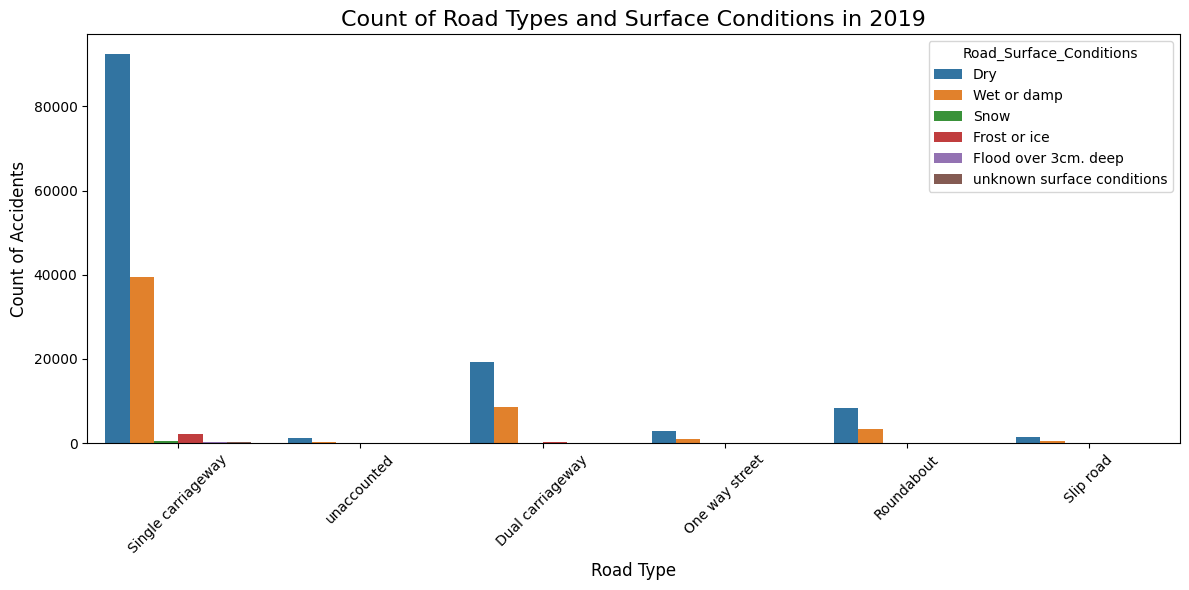

In [74]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Road_Type', hue='Road_Surface_Conditions', data=year_2019)
plt.title('Count of Road Types and Surface Conditions in 2019', fontsize=16)
plt.xlabel('Road Type', fontsize=12)
plt.ylabel('Count of Accidents', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
y20_rcondition_rtype = year_2020.groupby(['Road_Type', 'Road_Surface_Conditions']).count()
y20_rcondition_rtype

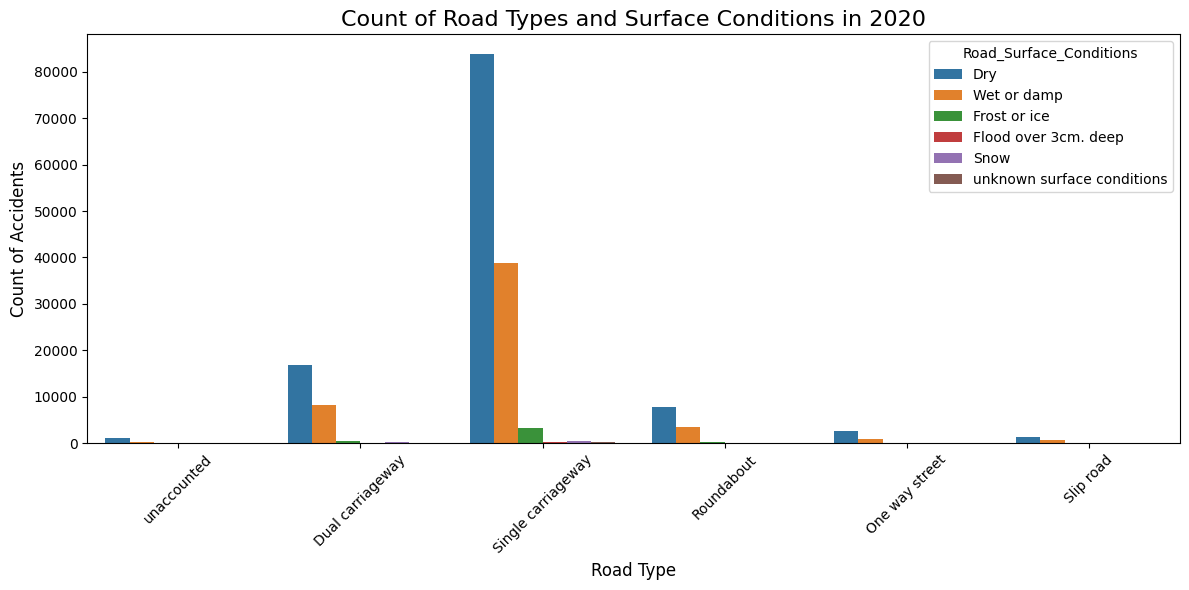

In [75]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Road_Type', hue='Road_Surface_Conditions', data=year_2020)
plt.title('Count of Road Types and Surface Conditions in 2020', fontsize=16)
plt.xlabel('Road Type', fontsize=12)
plt.ylabel('Count of Accidents', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
y21_rcondition_rtype = year_2021.groupby(['Road_Type', 'Road_Surface_Conditions']).count()
y21_rcondition_rtype

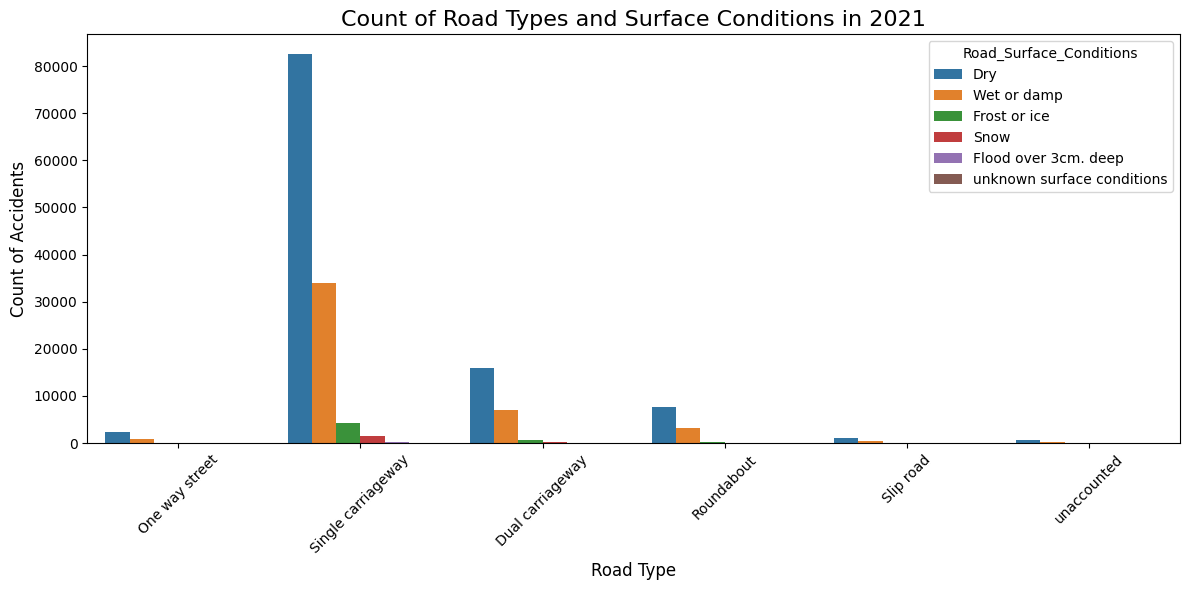

In [76]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Road_Type', hue='Road_Surface_Conditions', data=year_2021)
plt.title('Count of Road Types and Surface Conditions in 2021', fontsize=16)
plt.xlabel('Road Type', fontsize=12)
plt.ylabel('Count of Accidents', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
y22_rcondition_rtype = year_2022.groupby(['Road_Type', 'Road_Surface_Conditions']).count()
y22_rcondition_rtype

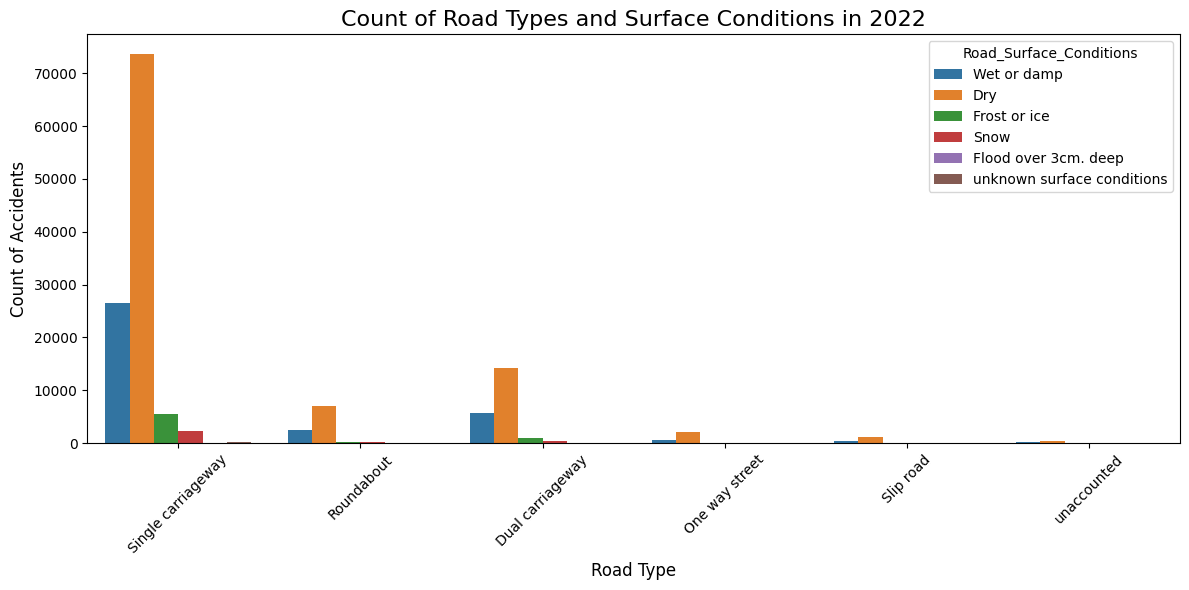

In [77]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Road_Type', hue='Road_Surface_Conditions', data=year_2022)
plt.title('Count of Road Types and Surface Conditions in 2022', fontsize=16)
plt.xlabel('Road Type', fontsize=12)
plt.ylabel('Count of Accidents', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
accident.info()

<h1>INSIGHT NUMBER 11</h1>

<h3>SUMMARY DATAFRAME OF ACCIDENT SEVERITY AND VEHICLE TYPE</h3>

In [ ]:
y19_severity_vtype = year_2019.groupby(['Accident_Severity', 'Vehicle_Type']).count()
y19_severity_vtype

In [ ]:
y20_severity_vtype = year_2020.groupby(['Accident_Severity', 'Vehicle_Type']).count()
y20_severity_vtype

In [ ]:
y21_severity_vtype = year_2021.groupby(['Accident_Severity', 'Vehicle_Type']).count()
y21_severity_vtype

In [ ]:
y22_severity_vtype = year_2022.groupby(['Accident_Severity', 'Vehicle_Type']).count()
y22_severity_vtype

<h1>INSIGHT NUMBER 12</h1>

<h1>GETTING URBAN OR RURAL AREA AND VEHICLE TYPE</h1>

In [ ]:
accident.info()

In [ ]:
y19_urban_type = year_2019.groupby(['Urban_or_Rural_Area', 'Vehicle_Type']).count()
y19_urban_type.unstack()

In [ ]:
y20_urban_type = year_2020.groupby(['Urban_or_Rural_Area', 'Vehicle_Type']).count()
y20_urban_type.unstack()

In [ ]:
y21_urban_type = year_2021.groupby(['Urban_or_Rural_Area', 'Vehicle_Type']).count()
y21_urban_type.unstack()

In [ ]:
y22_urban_type = year_2022.groupby(['Urban_or_Rural_Area', 'Vehicle_Type']).count()
y22_urban_type.unstack()

<h1>INSIGHT NUMBER 13</h1>

<h1>DATAFRAME SUMMARY OF WEATHER CONDITION AND ACCIDENT SEVERITY</h1>

In [ ]:
accident.info()

In [ ]:
y19_weather_severity = year_2019.groupby(['Weather_Conditions', 'Accident_Severity']).count()
y19_weather_severity.unstack()

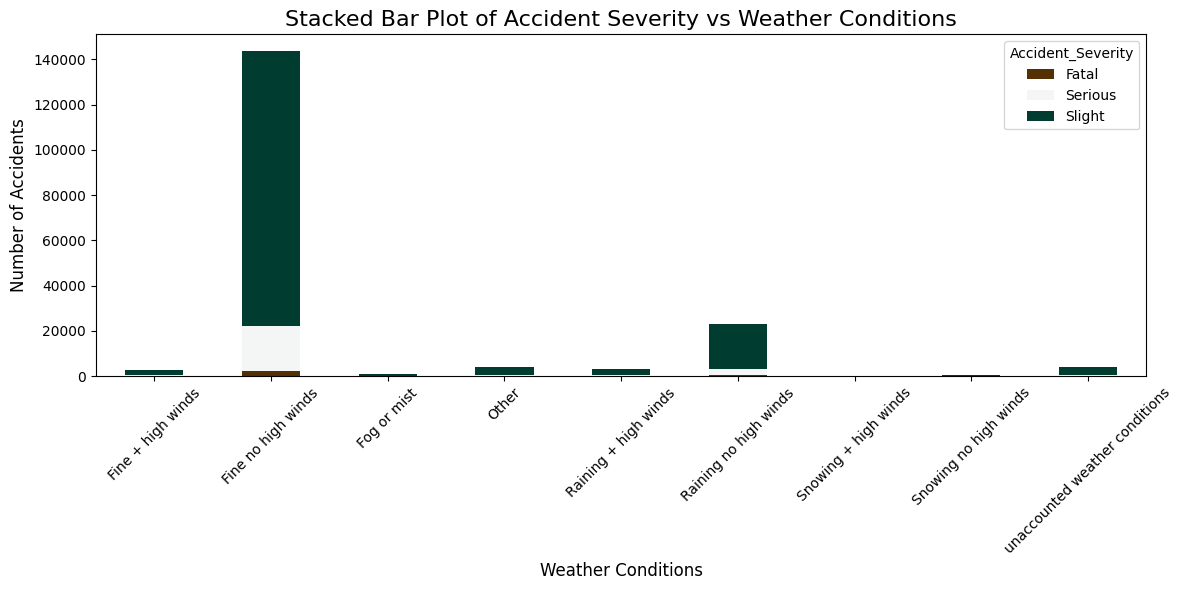

In [80]:
weather_severity_pivot = year_2019.groupby(['Weather_Conditions', 'Accident_Severity']).size().unstack()
weather_severity_pivot.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='BrBG')
plt.title('Accident Severity vs Weather Conditions in 2019', fontsize=16)
plt.xlabel('Weather Conditions', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
y20_weather_severity = year_2020.groupby(['Weather_Conditions', 'Accident_Severity']).count()
y20_weather_severity.unstack()

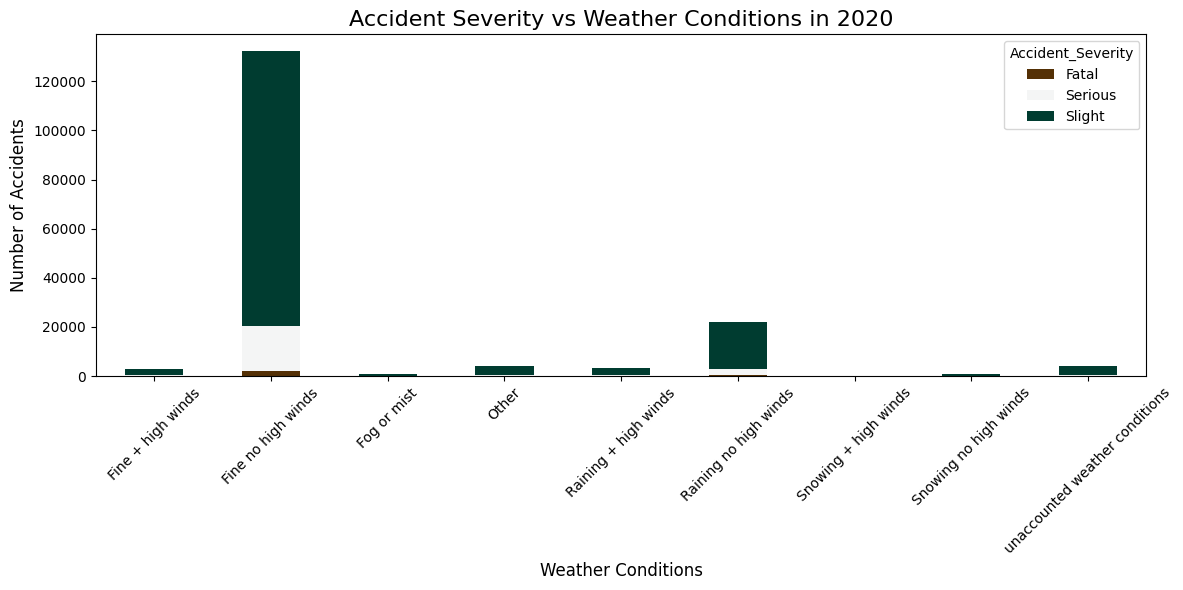

In [82]:
weather_severity_pivot = year_2020.groupby(['Weather_Conditions', 'Accident_Severity']).size().unstack()
weather_severity_pivot.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='BrBG')
plt.title('Accident Severity vs Weather Conditions in 2020', fontsize=16)
plt.xlabel('Weather Conditions', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
y21_weather_severity = year_2021.groupby(['Weather_Conditions', 'Accident_Severity']).count()
y21_weather_severity.unstack()

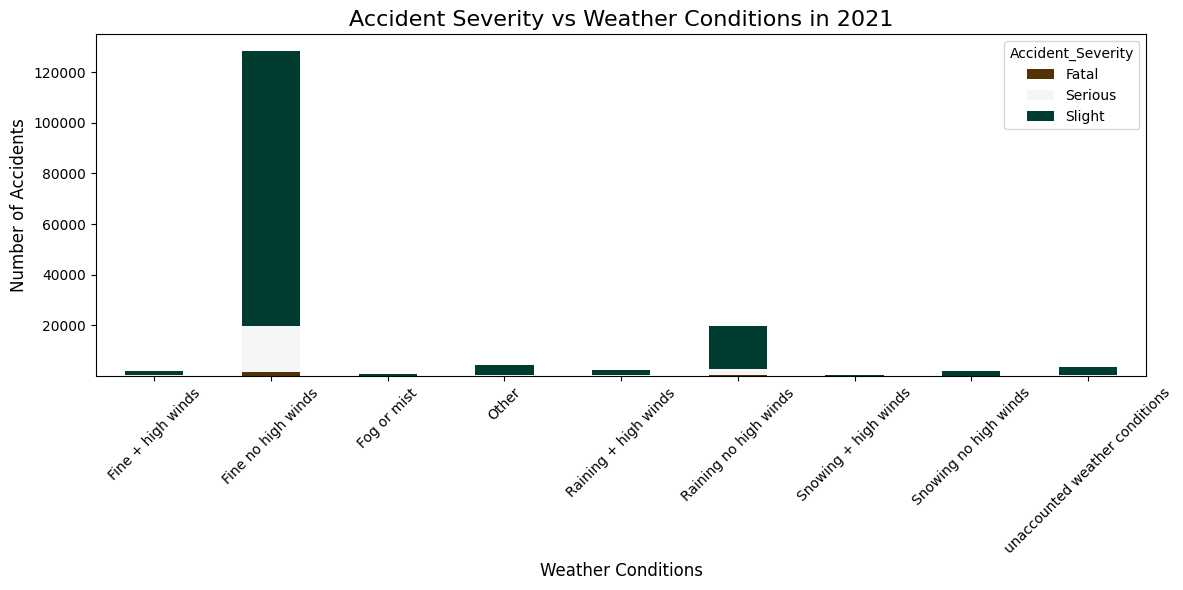

In [83]:
weather_severity_pivot = year_2021.groupby(['Weather_Conditions', 'Accident_Severity']).size().unstack()
weather_severity_pivot.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='BrBG')
plt.title('Accident Severity vs Weather Conditions in 2021', fontsize=16)
plt.xlabel('Weather Conditions', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
y22_weather_severity = year_2022.groupby(['Weather_Conditions', 'Accident_Severity']).count()
y22_weather_severity.unstack()

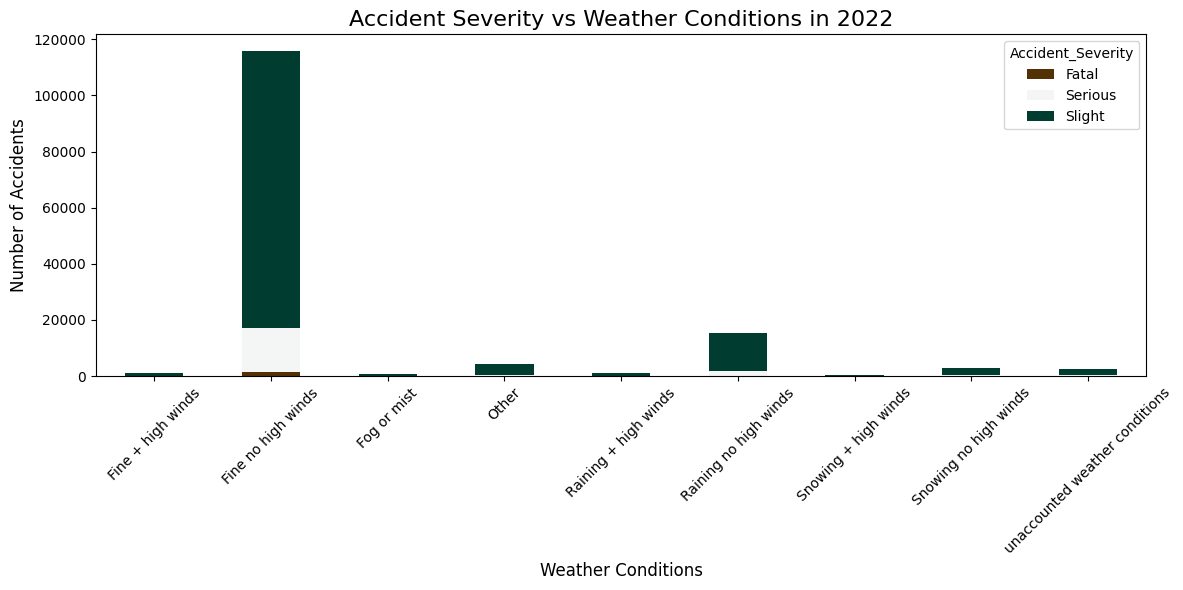

In [84]:
weather_severity_pivot = year_2022.groupby(['Weather_Conditions', 'Accident_Severity']).size().unstack()
weather_severity_pivot.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='BrBG')
plt.title('Accident Severity vs Weather Conditions in 2022', fontsize=16)
plt.xlabel('Weather Conditions', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<h1>INSIGHT NUMBER 14</h1>

<h2>CORRELATION OF NUMBER OF CASUALTIES AND NUMBER OF VEHICLES</h2>

In [ ]:
accident.info()

In [ ]:
accident['Number_of_Casualties'].corr(accident['Number_of_Vehicles'])

<h4>THERE IS NO CORRELATION BETWEEN NUMBER OF CASUALTIES AND NUMBER OF VEHICLES</h4>

<h1>INSIGHT NUMBER 15</h1>

<h3>LETS FIND OUT IF THERE IS CORRELATION BETWEEN NUMBER OF CASUALTIES AND NUMBER OF VEHICLE IN EACH YEAR</h3>

<h1>YEAR 2019</h1>

In [ ]:
year_2019['Number_of_Casualties'].corr(year_2019['Number_of_Vehicles'])

<h4>THERE IS NO CORRELATION BETWEEN NUMBER OF CASUALTIES AND NUMBER OF VEHICLES IN 2019</h4>

<h1>YEAR 2020</h1>

In [ ]:
year_2020['Number_of_Casualties'].corr(year_2020['Number_of_Vehicles'])

<h4>THERE IS NO CORRELATION BETWEEN NUMBER OF CASUALTIES AND NUMBER OF VEHICLES IN 2020</h4>

<h1>YEAR 2021</h1>

In [ ]:
year_2021['Number_of_Casualties'].corr(year_2021['Number_of_Vehicles'])

<h4>THERE IS NO CORRELATION BETWEEN NUMBER OF CASUALTIES AND NUMBER OF VEHICLES IN 2021</h4>

<h1>YEAR 2022</h1>

In [ ]:
year_2022['Number_of_Casualties'].corr(year_2022['Number_of_Vehicles'])

<h4>THERE IS NO CORRELATION BETWEEN NUMBER OF CASUALTIES AND NUMBER OF VEHICLES IN 2021</h4>

<h1>INSIGHT NUMBER 16</h1> 

In [ ]:
print(f"The total number of vehicles is {accident['Vehicle_Type'].value_counts().sum()}")

In [ ]:
accident['Vehicle_Type'].value_counts()

<h4>THE TOTAL OF VEHICLES IN THE ACCIDENT DATA IS 660,679. The vehicle type that has the most accident is CAR that has a total of 75.38% of all the accidents and the lowest number of accident is ridden by a horse with a total of 0.00061% of the total accident data</h4>

In [ ]:
accident.info()

In [ ]:
accident['Urban_or_Rural_Area'].value_counts().sum()

In [ ]:
accident.groupby(['Vehicle_Type', 'Urban_or_Rural_Area']).count()

<h1>Insight 17</h1>

<h4>THE TOTAL NUMBER OF ACCIDENT CAUSED BY A CAR IS 181,922 IT IS 75.38% OF ALL THE ACCIDENT HAPPENED IN UK FROM 2019-2022, AND MOST OF IT HAPPENED ON URBAN AREAS THAT HAS A 63.47% OF ALL THE ACCIDENT CAUSED BY A CAR</h4>

In [ ]:
year_2019[year_2019['Vehicle_Type'] == 'Car'].value_counts().sum()
#27.2%

In [ ]:
year_2020[year_2020['Vehicle_Type'] == 'Car'].value_counts().sum()
#25.68%

In [ ]:
year_2021[year_2021['Vehicle_Type'] == 'Car'].value_counts().sum()
#25.7%

In [ ]:
year_2022[year_2022['Vehicle_Type'] == 'Car'].value_counts().sum()
#22.4%

<H1>INSIGHT NUMBER 18</H1>

In [ ]:
print(f"THE MOST NUMBER OF ACCIDENT CAUSED BY A CAR IS FROM THE YEAR 2019 WHICH HAVE A TOTAL NUMBER OF {year_2019[year_2019['Vehicle_Type'] == 'Car'].value_counts().sum()} IT IS THE 27.2% OF ALL THE CAR ACCIDENT IN ALL 4 YEARS")

In [ ]:
print(f"THE LEAST CAR ACCIDENT HAPPENED ON THE YEAR 2022 THAT HAS A TOTAL NUMBER OF {year_2022[year_2022['Vehicle_Type'] == 'Car'].value_counts().sum()} WHICH IS THE 22.4% OF THE TOTAL CAR ACCIDENT IN 4 YEARS")

In [ ]:
year_2019.groupby(['Vehicle_Type', 'Urban_or_Rural_Area']).count()

<h1>INSIGHT NUMBER 19</h1>

<h4>IN THE TABLE ABOVE SHOWS THAT CAR IS THE MOST NUMBER OF ACCIDENT IN 2019 AND IT HAPPENED MOSTLY ON THE URBAN AREA WHICH HAS A TOTAL OF 81,320 THAT IS 62.4% OF THE CAR ACCIDENT IN 2019</h4>

In [ ]:
accident.info()

In [ ]:
accident.groupby(['Road_Type', 'Road_Surface_Conditions']).count()

In [ ]:
accident['Road_Type'].value_counts()

<h1>INSIGHT NUMBER 20</h1>

<h4>THE MOST NUMBER OF ACCIDENT HAPPENED ON A SINGLE CARRIAGEWAY TYPE OF ROAD WITH A TOTAL NUMBER OF 492,143 WHICH IS THE 74.5% OF ALL THE ACCIDENT IN 4 YEARS</h4>

<h1>INSIGHT NUMBER 21</h1>

<h4>MOST ACCIDENT HAPPENED IN A SINGLE CARRIAGEWAY TYPE OF ROAD, AND ACCIDENT MOSTLY HAPPENED WHEN ITS DRY WITH A TOTAL NUMBER OF 332,698 WHICH IS THE 67.6% OF ALL THE ACCIDENT HAPPENED IN A SINGLE CARRIAGEWAY TYPE OF ROAD</h4>

In [ ]:
year_2019['Road_Type'].value_counts()
#27.4%

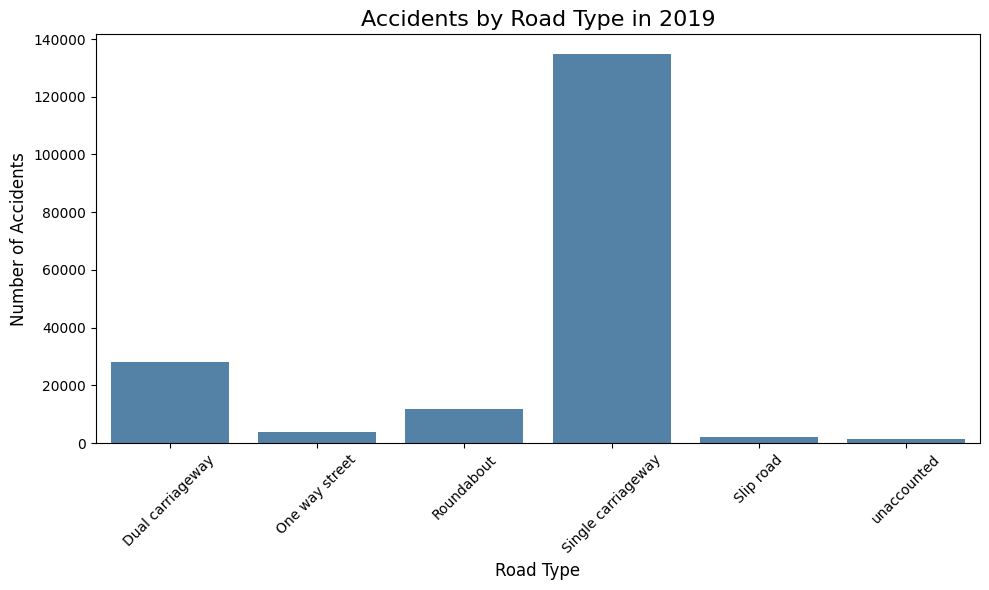

In [59]:
y19_road_type = year_2019.groupby('Road_Type').size().reset_index(name='Accident Count')

plt.figure(figsize=(10, 6))
sns.barplot(x='Road_Type', y='Accident Count', data=y19_road_type, color='steelblue')
plt.title('Accidents by Road Type in 2019', fontsize=16)
plt.xlabel('Road Type', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
year_2020['Road_Type'].value_counts()
#25.7%

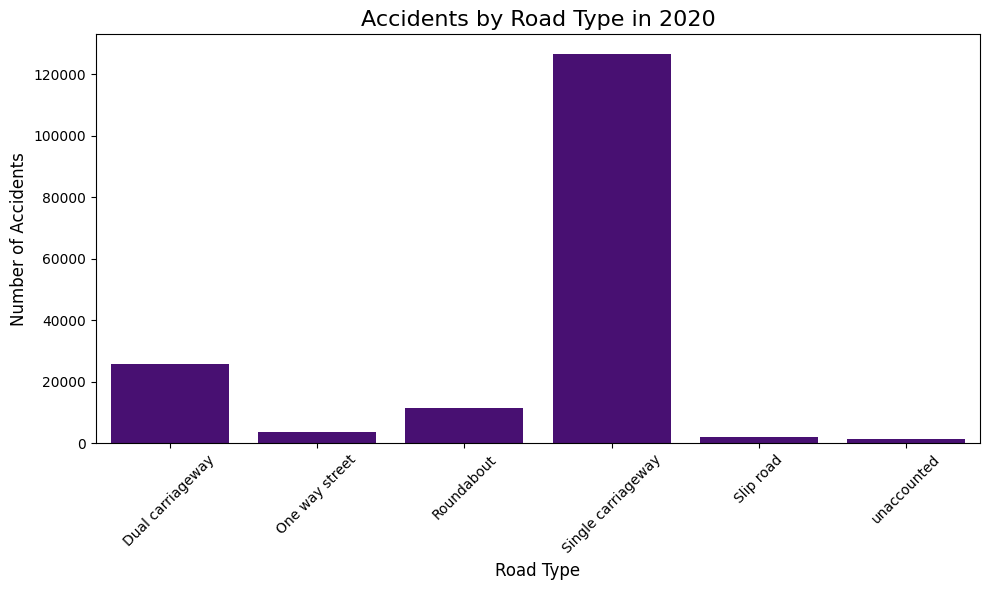

In [68]:
y20_road_type = year_2020.groupby('Road_Type').size().reset_index(name='Accident Count')

plt.figure(figsize=(10, 6))
sns.barplot(x='Road_Type', y='Accident Count', data=y20_road_type, color='indigo')
plt.title('Accidents by Road Type in 2020', fontsize=16)
plt.xlabel('Road Type', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [69]:
year_2021['Road_Type'].value_counts()
#24.9

Road_Type
Single carriageway    122573
Dual carriageway       24052
Roundabout             11041
One way street          3271
Slip road               1698
unaccounted              919
Name: count, dtype: int64

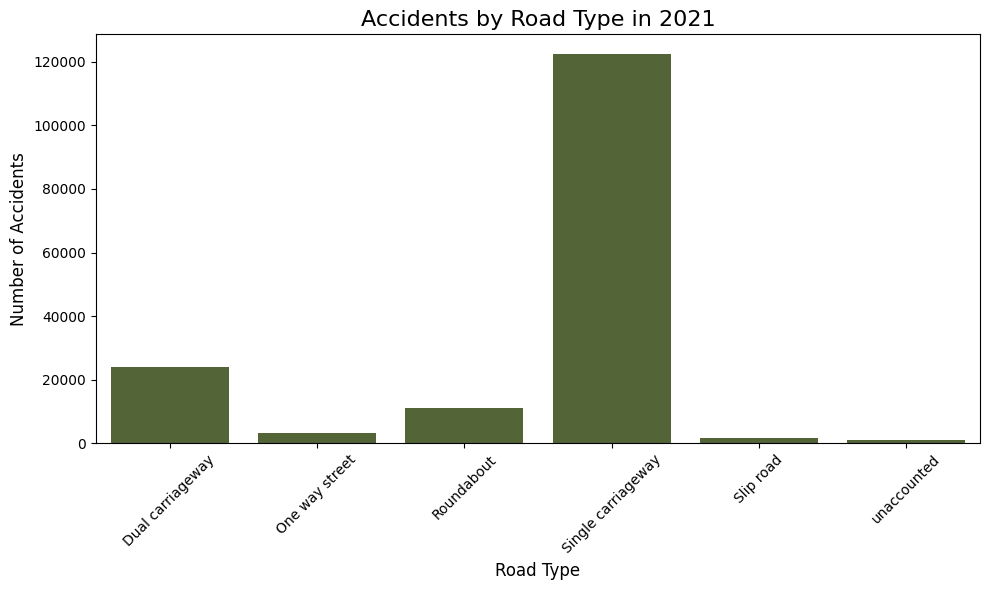

In [70]:
y21_road_type = year_2021.groupby('Road_Type').size().reset_index(name='Accident Count')

plt.figure(figsize=(10, 6))
sns.barplot(x='Road_Type', y='Accident Count', data=y21_road_type, color='darkolivegreen')
plt.title('Accidents by Road Type in 2021', fontsize=16)
plt.xlabel('Road Type', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [71]:
year_2022['Road_Type'].value_counts()
#22%

Road_Type
Single carriageway    108039
Dual carriageway       21415
Roundabout              9888
One way street          2926
Slip road               1536
unaccounted              615
Name: count, dtype: int64

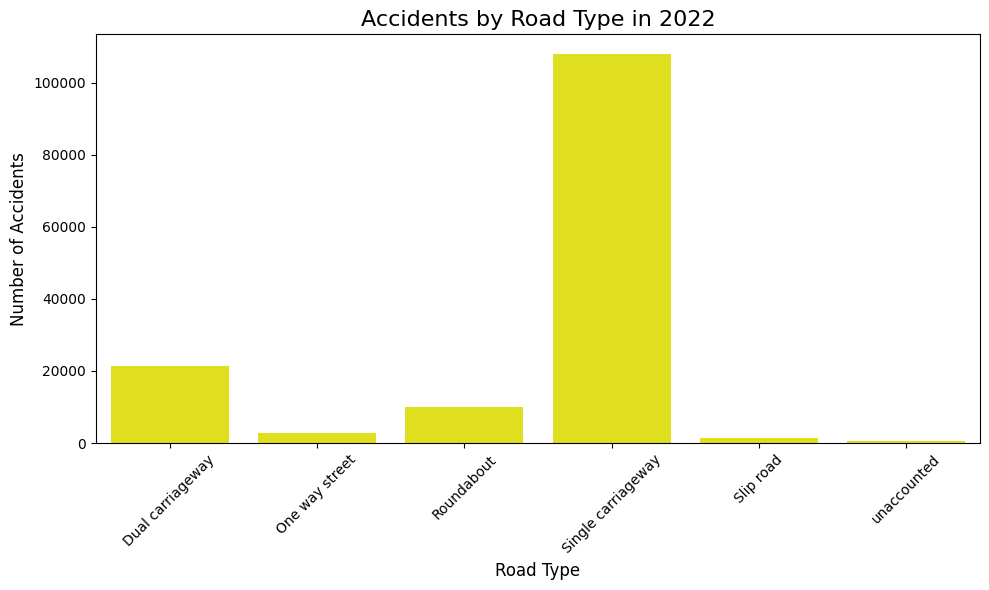

In [72]:
y22_road_type = year_2022.groupby('Road_Type').size().reset_index(name='Accident Count')

plt.figure(figsize=(10, 6))
sns.barplot(x='Road_Type', y='Accident Count', data=y22_road_type, color='yellow')
plt.title('Accidents by Road Type in 2022', fontsize=16)
plt.xlabel('Road Type', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
